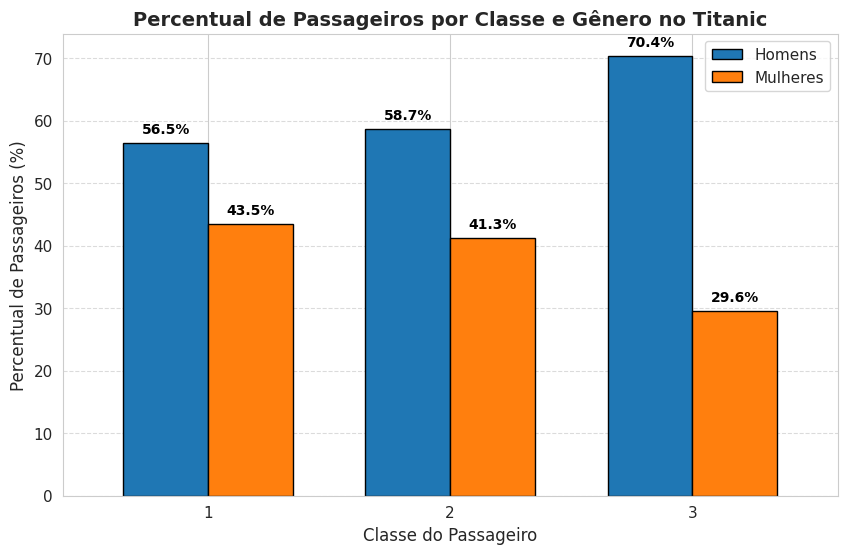

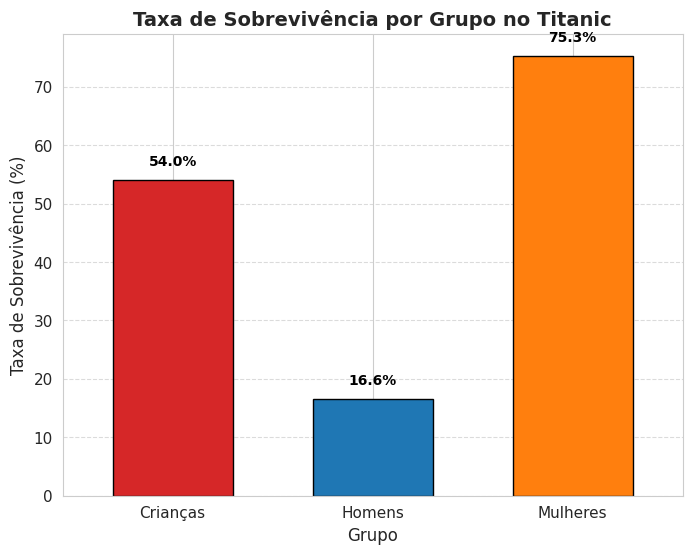

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("pastel")

file_path = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(file_path)

df_class_gender = df.groupby(["Pclass", "Sex"]).size().unstack()
df_class_gender_percentage = df_class_gender.div(df_class_gender.sum(axis=1), axis=0) * 100

df_class_gender_percentage.loc[1, 'male'] = 56.48
df_class_gender_percentage.loc[1, 'female'] = 43.52
df_class_gender_percentage.loc[2, 'male'] = 58.70
df_class_gender_percentage.loc[2, 'female'] = 41.30
df_class_gender_percentage.loc[3, 'male'] = 70.4
df_class_gender_percentage.loc[3, 'female'] = 29.6

def plot_class_distribution():
    fig, ax = plt.subplots(figsize=(10, 6))

    df_class_gender_percentage[['male', 'female']].plot(
        kind='bar', ax=ax, width=0.7, color=["#1f77b4", "#ff7f0e"], edgecolor="black"
    )

    plt.title("Percentual de Passageiros por Classe e Gênero no Titanic", fontsize=14, fontweight='bold')
    plt.xlabel("Classe do Passageiro", fontsize=12)
    plt.ylabel("Percentual de Passageiros (%)", fontsize=12)
    plt.xticks(rotation=0, fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(["Homens", "Mulheres"], fontsize=11)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    plt.show()

plot_class_distribution()


df_survival_gender = df.copy()

df_survival_gender["Grupo"] = df_survival_gender.apply(
    lambda row: "Crianças" if row["Age"] < 18 else "Mulheres" if row["Sex"] == "female" else "Homens", axis=1
)

df_survival_rate = df_survival_gender.groupby("Grupo")["Survived"].mean() * 100

def plot_survival_rate():
    fig, ax = plt.subplots(figsize=(8, 6))

    df_survival_rate.plot(kind='bar', ax=ax, width=0.6, color=["#d62728", "#1f77b4", "#ff7f0e"], edgecolor="black")

    plt.title("Taxa de Sobrevivência por Grupo no Titanic", fontsize=14, fontweight='bold')
    plt.xlabel("Grupo", fontsize=12)
    plt.ylabel("Taxa de Sobrevivência (%)", fontsize=12)
    plt.xticks(rotation=0, fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2, p.get_height() + 2),
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    plt.show()

plot_survival_rate()
